<p>
    <b>Third-year Coursework</b><br><br>
    <b>Математическое моделирование свойств жидкостей</b><br>
    <b>Mathematical modeling of fluid properties</b><br>
</p>
<p>
    This notebook outlines the computation of <b>viscosity</b> for an isooctane molecule.
    <ul>
        <li>STEP 1: Files execution</li>
        <li>STEP 2: Data processing</li>
        <li>STEP 3: Data visualisation</li>
        <li>STEP 4: Comparison</li>
    </ul>
</p>

<h2>STEP 2</h2>
<h3>Data processing</h3>

In [1]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np

<h4>1) Pressure value: 0.1 MPa</h4>

In [2]:
# import txt file and create dataframe
filename1 = "profile-av/profile-av1.txt"
results_av_v1 = pd.read_csv(filename1, sep=' ', 
                names = ["No.", "C1", "C2"]) # assign names to columns

results_av_v1.head()

,No.,C1,C2
0,1,1100,-0.000092
1,2,1100,-0.000072
2,3,1100,-0.000059
3,4,1100,-0.000054
4,5,1100,-0.000045


In [3]:
# Calculate slope НАКЛОН
from scipy.interpolate import *
import numpy as np

x = results_av_v1["No."].iloc[3:19].tolist() # extract data from 2nd to 9th
y = results_av_v1["C2"].iloc[3:19].tolist()

slope1 = np.polyfit(x, y, 1) # slope1 constains SLOPE and INTERCEPT
print("Slope: " + str(slope1[0])) # SLOPE

Slope: 7.577030294117646e-06


<h4>2) Pressure value: 26.4 MPa</h4>

In [4]:
# import txt file and create dataframe
filename2 = "profile-av/profile-av2.txt"
results_av_v2 = pd.read_csv(filename2, sep=' ', 
                names = ["No.", "C1", "C2"]) # assign names to columns

results_av_v2.head()

,No.,C1,C2
0,1,1100,-0.000069
1,2,1100,-0.000051
2,3,1100,-0.000045
3,4,1100,-0.000041
4,5,1100,-0.000034


<h4>3) Pressure value: 50.0 MPa</h4>

In [5]:
# import txt file and create dataframe
filename3 = "profile-av/profile-av3.txt"
results_av_v3 = pd.read_csv(filename3, sep=' ', 
                names = ["No.", "C1", "C2"]) # assign names to columns

results_av_v3.head()

,No.,C1,C2
0,1,1100,-0.000057
1,2,1100,-0.000046
2,3,1100,-0.000038
3,4,1100,-0.000033
4,5,1100,-0.000032


<h4>4) Pressure value: 70.0 MPa</h4>

In [6]:
# import txt file and create dataframe
filename4 = "profile-av/profile-av4.txt"
results_av_v4 = pd.read_csv(filename4, sep=' ', 
                names = ["No.", "C1", "C2"]) # assign names to columns

results_av_v4.head()

,No.,C1,C2
0,1,1100,-0.000050
1,2,1100,-0.000039
2,3,1100,-0.000032
3,4,1100,-0.000029
4,5,1100,-0.000028


<h4>5) Pressure value: 100.0 MPa</h4>

In [7]:
# import txt file and create dataframe
filename5 = "profile-av/profile-av5.txt"
results_av_v5 = pd.read_csv(filename5, sep=' ', 
                names = ["No.", "C1", "C2"]) # assign names to columns

results_av_v5.head()

,No.,C1,C2
0,1,1100,-0.000042
1,2,1100,-0.000033
2,3,1100,-0.000028
3,4,1100,-0.000024
4,5,1100,-0.000022


<h2>STEP 3</h2>
<h3>Data visualisation</h3><br>
GRAPH: pressure vs. viscosity

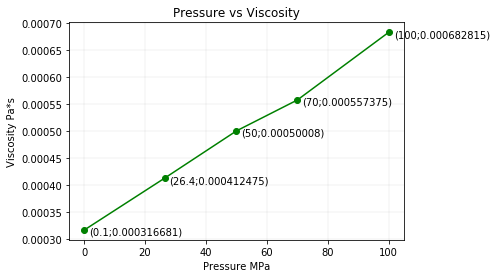

In [8]:
pressure_values = [0.1, 26.4, 50, 70, 100] # Mega Pascal
viscosity_values = [0.000316681, 0.000412475, 0.00050008, 0.000557375, 0.000682815] # Pa*s (Simulation data)
labels = ['(0.1;0.000316681)', '(26.4;0.000412475)', '(50;0.00050008)',
          '(70;0.000557375)', '(100;0.000682815)']

# create a line chart, pressure on x-axis, viscosity on y-axis 
plt.plot(pressure_values, viscosity_values, color='green', marker='o', linestyle='solid') 
# add a title 
plt.title("Pressure vs Viscosity") 
# add a label to the x-axis and y-axis 
plt.xlabel("Pressure MPa")
plt.ylabel("Viscosity Pa*s") 
plt.grid(color='gray', linestyle='-', linewidth=0.1)

# label each point
for label, pressure_v, viscosity_v in zip(labels, pressure_values, viscosity_values):
    plt.annotate(label, xy=(pressure_v, viscosity_v), # put the label with its point
    xytext=(5, -5),                                 # but slightly offset
    textcoords='offset points') 

# plt.axis([-5, 100, -5, 1.])
plt.savefig('viscosity.png', dpi=300)
plt.show() 

<h2>STEP 4</h2>
<h3>Comparison</h3><br>
Error computation

In [13]:
# Experimental data

# Source (Pádua)
# Temperature: 298.15 K
pressure_raw_1 = [0.1, 30.1, 50.05, 70, 100.1] # MPa
viscosity_raw_1 = [0.473, 0.669, 0.812, 0.971, 1.23] # mPa s
viscosity_experimental_1 = [i * 0.001 for i in viscosity_raw_1] # Pa s

# Source (Dymond)
# Temperature: 24.99 C
pressure_raw_2 = [0.1, 26.4, 50.7, 100.5, 100.5] # MPa 200.4
viscosity_raw_2 = [0.4718, 0.641, 0.814, 1.237, 1.237] # mPa s 2.482
viscosity_experimental_2 = [i * 0.001 for i in viscosity_raw_2] # Pa s
# https://stackoverflow.com/questions/35166633/how-do-i-multiply-each-element-in-a-list-by-a-number/35166717

# Simulation data (See step 3)
# Temperature: 298 K

In [14]:
# MAE - mean absolute error
def mae(pred_list, true_list):
    if len(pred_list) != len(true_list):
        raise Exception("Error: number of elements not match!")
    true_list, pred_list = np.array(true_list), np.array(pred_list)
    return np.mean(np.abs(true_list - pred_list))

# MAPE - mean absolute percentage error
def mape(pred_list, true_list):
    if len(pred_list) != len(true_list):
        raise Exception("Error: number of elements not match!")
    true_list, pred_list = np.array(true_list), np.array(pred_list)
    return np.mean(np.abs((true_list - pred_list) / true_list)) * 100

In [15]:
# Error computation

print("Model's Error: {:.6f} kg/L = {:.6f} %"
      .format(mae(viscosity_values, viscosity_experimental_1), 
              mape(viscosity_values, viscosity_experimental_1)))

Model's Error: 0.000337 kg/L = 39.378235 %


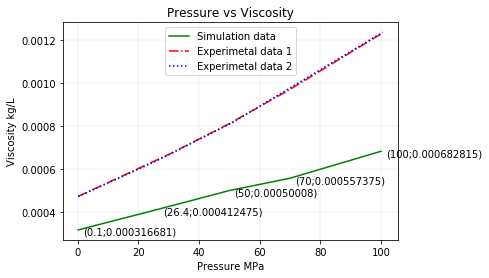

In [16]:
# Visualisation
# create a line chart, pressure on x-axis, viscosity on y-axis 
plt.plot(pressure_values, viscosity_values, 'g-', label='Simulation data')
plt.plot(pressure_raw_1, viscosity_experimental_1, 'r-.', label='Experimetal data 1')
plt.plot(pressure_raw_2, viscosity_experimental_2, 'b:', label='Experimetal data 2')

# add a title 
plt.title("Pressure vs Viscosity") 

# add a legend
plt.legend(loc=9) # top center

# label each point
for label, pressure_v, viscosity_v in zip(labels, pressure_values, viscosity_values):
    plt.annotate(label, xy=(pressure_v, viscosity_v), # put the label with its point
    xytext=(5, -5),                                 # but slightly offset
    textcoords='offset points') 

# add a label to the x-axis and y-axis 
plt.xlabel("Pressure MPa")
plt.ylabel("Viscosity kg/L")
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.savefig('viscosity_comparison.png', dpi=300)
